In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# Outline
1. Reading the Data
2. Missing Value's
3. EDA / Hypothesis Testing
4. Feature Engineering
5. Model Building and Evaluation
6. Model Stacking

### 1. Reading the Data

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', encoding= 'unicode_escape')

# Create Back-up of Training Data
train_b = train.copy()

In [12]:
print('Shape of Training Data :',train.shape)
train.head(5)

Shape of Training Data :  (30363, 17)


,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,overall,score_1,score_2,score_3,score_4,score_5,score_6
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,5.0,4.0,5.0,0
1,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49
2,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,0
3,16,startup_1,NaN,"Dec 6, 2018",Current Employee,Anonymous Employee,Review,The people are great to work with,There is lower compensation than expected,NaN,5.0,NaN,NaN,NaN,NaN,NaN,0
4,17,startup_1,NaN,"Nov 29, 2018",Current Employee,Anonymous Employee,Review of Google,"The people are great to work with, good perks.",Wide variety in experience based on team.,NaN,5.0,4.0,5.0,5.0,5.0,4.0,2


In [13]:
# Distribution of numerical Features
train.describe()

,ID,overall,score_1,score_2,score_3,score_4,score_5,score_6
count,30363.000000,30363.000000,27173.000000,24310.000000,27198.000000,27164.000000,26903.000000,30363.000000
mean,33779.227382,3.824754,3.372263,3.776800,3.631609,3.936994,3.322269,1.087607
std,19491.487518,1.155155,1.301732,1.296621,1.228599,1.047924,1.312911,4.920717
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16889.500000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,33889.000000,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000
75%,50628.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000
max,67529.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,449.000000


### Metadata
1. "ID" - Identification Number
2. "Place" - Startups (1 to 6)
3. "location" - Location of Startup
4. "Date" - Review Date
5. "Status" - Current status of reviewer with the startup
6. "job_titl" - Position of work at athe startup
7. "summary" - Overall summary
8. "positives" - pros of Job
9. "negatives" - Cons of Job
10. "advice_to_mgmt" - Comments given by the reviewer to the management
11. "overall" - Overall rating provided by the reviewer
12. "score_1" to "score_5" - Intricate rating which reflects the condition of work at the startup (1-5)
13. 'score_6' - Number of likes received by the reviewer of the review

### 2. Missing values

11231  or  0.3699  % Missing values in  location
63    or  0.0021 % Missing values in  summary
1    or  0.0 % Missing values in  negatives
13209  or  0.435  % Missing values in  advice_to_mgmt
3190  or  0.1051  % Missing values in  score_1
6053  or  0.1994  % Missing values in  score_2
3165  or  0.1042  % Missing values in  score_3
3199  or  0.1054  % Missing values in  score_4
3460  or  0.114  % Missing values in  score_5


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

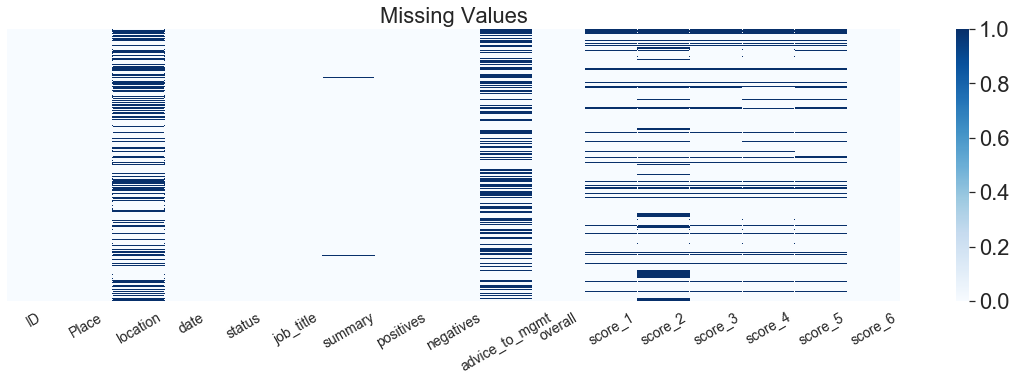

In [16]:
# Check for missing values
count = 0
for i in train.columns:
    if train.isnull().sum()[i] > 0:
        if train.isnull().sum()[i] < 1000:
            print(train.isnull().sum()[count],'   or ',round((train.isnull().sum()[i])/(train.shape[0]),4),'%','Missing values in ',train.columns[count])
        else:
            print(train.isnull().sum()[count],' or ',round((train.isnull().sum()[i])/(train.shape[0]),4),' %','Missing values in ',train.columns[count])
        
    count += 1
        
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale=2)
plt.title('Missing Values', fontsize=22)
sns.heatmap(train.isnull(), cmap="Blues", yticklabels=False, ax=ax)
plt.xticks(rotation = 30)
plt.xticks(fontsize= 14)

#### We need to take care of missing values in a few columns. It would be a good idea to drop advice_to_mgmt because of 43.5% missing Values

## 3. EDA

1. Ex-emplyees may rate low compared to present employees. Verify!
2. What are the most common word used by reviewer while writing summary, positives, negatives, advice_to_mgmt.

## Ex-employees tend to rate lower. (Hypothesis Testing)

Null Hypothesis: Mean of ratings of Ex-employees is equal to the mean review ratings.  
Alternative Hypothesis: Mean of ratings of Ex-employees is Lower than the mean review ratings.

In [6]:
train[train.status == 'Current Employee ']['overall'].mean()

3.968078447736282

In [7]:
from scipy import stats
from statsmodels.stats import weightstats as ws

ztest, pval = ws.ztest(train[train.status == 'Former Employee ']['overall'], x2 = train['overall'], alternative = 'smaller')
print('Z-Score : ',ztest,'P-value : ', pval)

Z-Score :  -18.872799162317683 P-value :  9.545644691114216e-80


(array([-1000.,     0.,  1000.,  2000.,  3000.]),
 <a list of 5 Text yticklabel objects>)

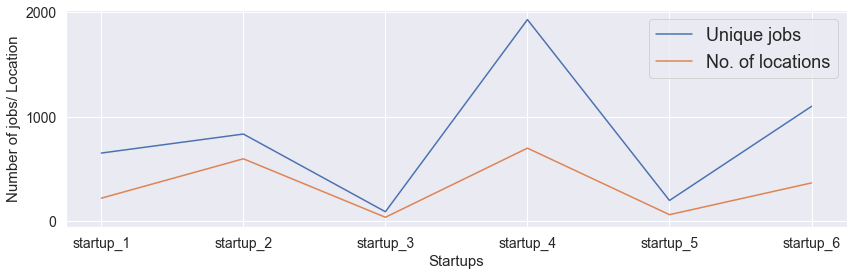

In [8]:
plt_df = pd.DataFrame({'place':train.groupby('Place')['job_title'].nunique().index,
                      'jobs':train.groupby('Place')['job_title'].nunique().values,
                      'locations':train.groupby('Place')['location'].nunique().values})
plt.figure(figsize=(14,4))
plt.plot(plt_df.place,plt_df.jobs,label='Unique jobs')
plt.plot(plt_df.place,plt_df.locations,label='No. of locations')
plt.xlabel('Startups',fontsize = 15)
plt.ylabel('Number of jobs/ Location',fontsize = 15)
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Text(0.5, 1.0, 'Overall vs Score_1 to score_6')

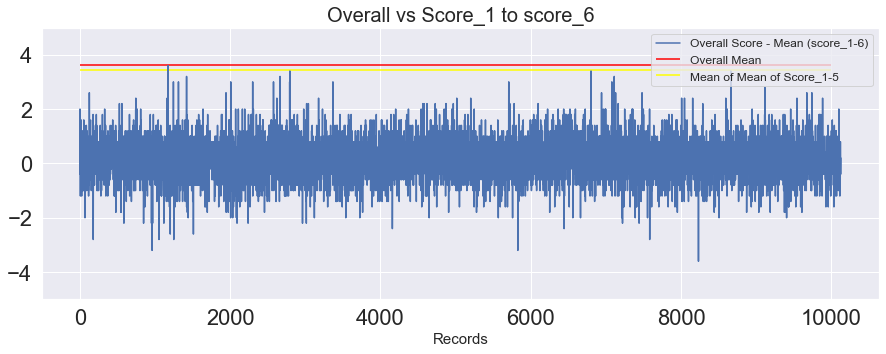

In [9]:
# Relation between overall & scores_1-scores_5
plt_df2 = train.dropna().copy()
plt_df2['mean_score'] = (plt_df2['score_1']+plt_df2['score_2']+plt_df2['score_3']+plt_df2['score_4']+plt_df2['score_5'])/5
plt.figure(figsize = (15,5))
plt.plot(plt_df2.reset_index().index,(plt_df2.overall-plt_df2.mean_score),label='Overall Score - Mean (score_1-6)')
plt.ylim(-5,5)
plt.hlines(plt_df2.overall.mean(),0,10000,label = 'Overall Mean',color='red')
plt.hlines(plt_df2.mean_score.mean(),0,10000,label = 'Mean of Mean of Score_1-5',color='yellow')
plt.legend(fontsize=12)
plt.xlabel('Records',fontsize = 15)
plt.title('Overall vs Score_1 to score_6', fontsize = 20)

Text(0.5, 0, 'Status')

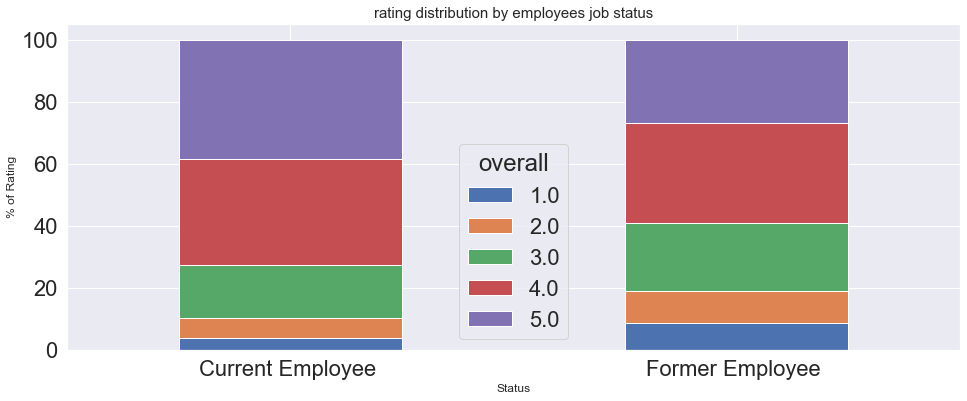

In [10]:
# Overall rating distribution by employee status
train.groupby('status')['overall'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,figsize = (16,6))
plt.xticks(rotation = 0)
plt.ylabel('% of Rating',fontsize=12)
plt.title('rating distribution by employees job status',fontsize=15)
plt.xlabel('Status',fontsize=12)

In [11]:
# Extract text from summary, positives, negatives, advice_to_mgmt to plot wordcloud
def get_text(df):
    all_words = ''
    for val in df:
        val = str(val) 

        # split the text 
        tokens = val.split() 

        #Converts to lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        all_words += " ".join(tokens)+" "
    return all_words
  
text_summary = get_text(train.summary)
text_positives = get_text(train.positives)
text_negatives = get_text(train.negatives)
text_advice = get_text(train.advice_to_mgmt.dropna())

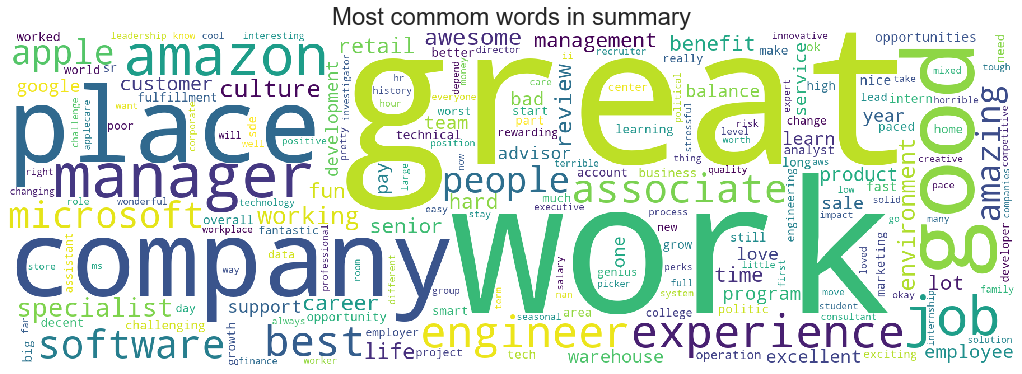

In [12]:
# Most common words in Summary
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1800, height = 600, collocations=False, background_color ='white', 
                 min_font_size = 10).generate(text_summary) 
  
# plot the WordCloud image                    
plt.figure(figsize = (14, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.title('Most commom words in summary')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

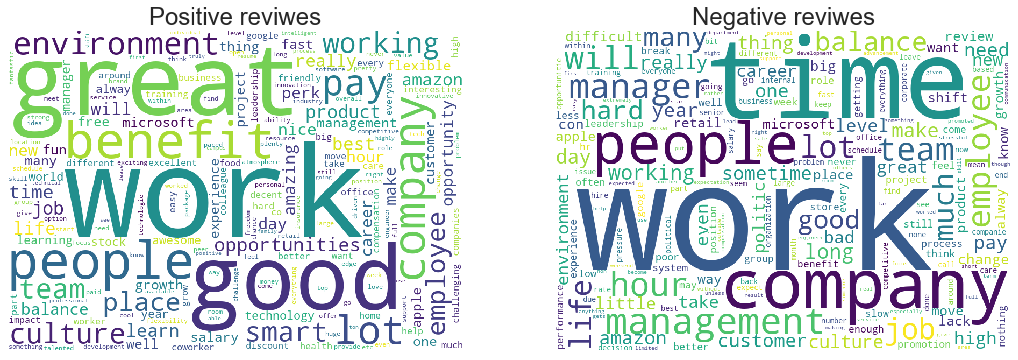

In [13]:
# Most common words in Summary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

wordcloud_positives = WordCloud(width = 850, height = 600, collocations=False, background_color ='white', 
                 min_font_size = 10).generate(text_positives) 
wordcloud_negatives= WordCloud(width = 850, height = 600, collocations=False, background_color ='white', 
                 min_font_size = 10).generate(text_negatives)
  
# plot the WordCloud  
ax1.imshow(wordcloud_positives) 
ax2.imshow(wordcloud_negatives)
ax1.set_title('Positive reviwes')
ax2.set_title('Negative reviwes')
ax1.axis("off")
ax2.axis("off")
plt.show()

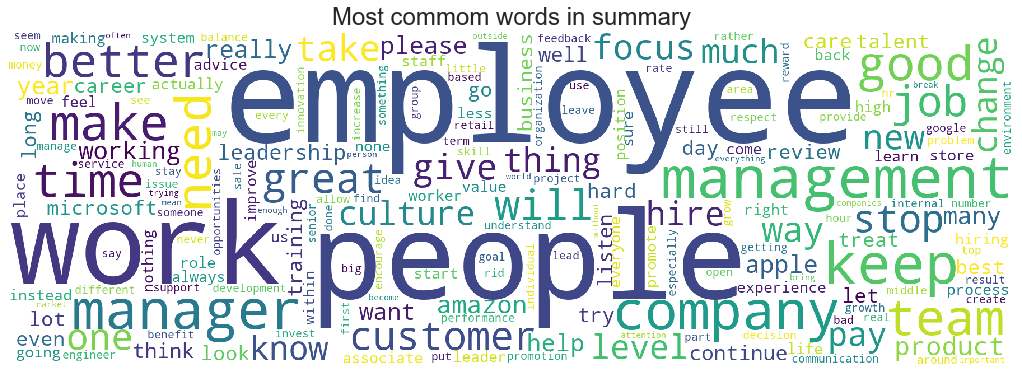

In [14]:
# Most common words in advice_to_mgmt
wordcloud = WordCloud(width = 1800, height = 600, collocations=False, background_color ='white', 
                 min_font_size = 10).generate(text_advice) 
  
# plot the WordCloud                 
plt.figure(figsize = (14, 6), facecolor = None)
plt.imshow(wordcloud)
plt.title('Most commom words in summary')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

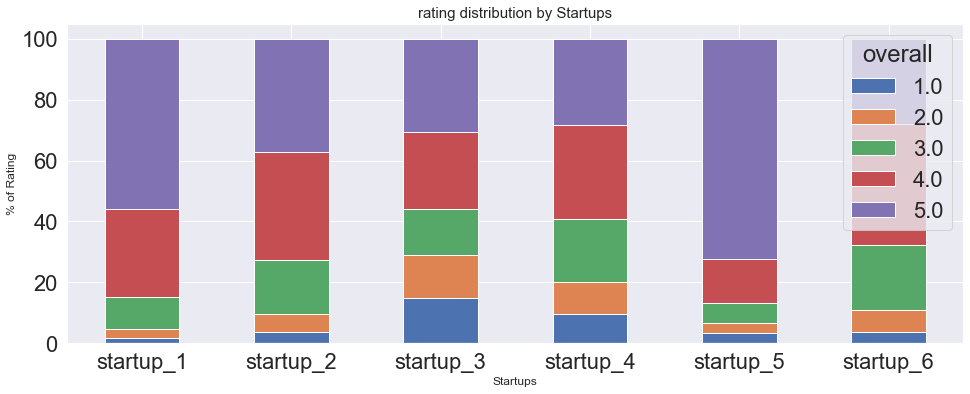

In [15]:
# Overall rating distribution by employee status
train.groupby('Place')['overall'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,figsize = (14,6))
plt.xticks(rotation = 0)
plt.ylabel('% of Rating',fontsize=12)
plt.title('rating distribution by Startups',fontsize=15)
plt.xlabel('Startups',fontsize=12)
plt.tight_layout()

## Key-Takeaways from EDA
1. startup_5 has the best overall rating compared to other startups, whereas startup_4 has most number of unique job roles and locations.
2. The Mean of Score_1 to score_5 is close to overall score & in majority cases, they are within 1 start range from each other.
3. Our assumption was right, Ex-employees tend to rate lower as compared to current employees.
4. Most of the negatives feedback & advice to management reviews contain words like time, work, pay, management which gives us a lot of idea about where the problem lies.

## Feature Engineering

In [16]:
# Location - missing values imputation
train2 = train.copy()

def treat_location(df):
    df.location = df.location.fillna('NA(NA')
    
    # Separate Country from location
    df['country'] = np.nan
    df.country = df.location.apply(lambda x : x.split('(')[1].strip().split(')')[0] if len(x.split('(')) > 1 else ('usa' if  '(' not in x else 'NA'))
    
    df.location = df.location.apply(lambda x : x.split('(')[0].strip() if ('(') in x else x)
    return df

train = treat_location(train)
test = treat_location(test)

In [17]:
# extract and encode countries

# all countries present in training and testing data
from sklearn.preprocessing import LabelEncoder

all_countries = []
for i in range(train.shape[0]):
    if train.country[i] not in all_countries:
        all_countries.append(train.country[i])
        
for i in range(test.shape[0]):
    if test.country[i] not in all_countries:
        all_countries.append(test.country[i])
        
le_countries = LabelEncoder().fit(all_countries)
train.country = le_countries.transform(train.country)
test.country = le_countries.transform(test.country)

In [18]:
# extract and encode locations

# all City/Town present in training and testing data
all_locations = []
for i in range(train.shape[0]):
    if train.location[i] not in all_locations:
        all_locations.append(train.location[i])
        
for i in range(test.shape[0]):
    if test.location[i] not in all_locations:
        all_locations.append(test.location[i])
        
le_locations = LabelEncoder().fit(all_locations)
train.location = le_locations.transform(train.location)
test.location = le_locations.transform(test.location)

In [19]:
# Encode Place (Startup's)
le_place = LabelEncoder().fit(train.Place.unique())
train.Place = le_place.transform(train.Place)
test.Place = le_place.transform(test.Place)

In [20]:
# encode status (Current/Former employee)
train.status = train.status.apply(lambda x : 1 if x == 'Current Employee ' else 0)
test.status = test.status.apply(lambda x : 1 if x == 'Current Employee ' else 0)

In [21]:
# encode job titles
all_job_title = []
for i in range(train.shape[0]):
    if train.job_title[i] not in all_job_title:
        all_job_title.append(train.job_title[i])
        
for i in range(test.shape[0]):
    if test.job_title[i] not in all_job_title:
        all_job_title.append(test.job_title[i])
        
le_job_title = LabelEncoder().fit(all_job_title)
train.job_title = le_job_title.transform(train.job_title)
test.job_title = le_job_title.transform(test.job_title)

In [22]:
# Extract year, month, day from Date
train['year'] = train['date'].apply(lambda x : int(x.split(' ')[3]))
train['month'] = train['date'].apply(lambda x : (x.split(' ')[1]))
train['day'] = train['date'].apply(lambda x : int(x.split(' ')[2].split(',')[0]))

# remove invalid values (0)
train['day'] = train['day'].apply(lambda x : int(train.day.mean()) if x == 0 else x)
train['year'] = train['year'].apply(lambda x : int(train.year.mean()) if x == 0 else x)

train.drop('date', axis=1, inplace = True)


test['date'] = test['date'].apply(lambda x : ' Dec 10, 2018' if x == 'None' else x)
test['year'] = test['date'].apply(lambda x : int(x.split(' ')[3]))
test['month'] = test['date'].apply(lambda x : (x.split(' ')[1]))
test['day'] = test['date'].apply(lambda x : int(x.split(' ')[2].split(',')[0]))

# remove invalid values (0)
test['day'] = test['day'].apply(lambda x : int(test.day.mean()) if x == 0 else x)
test['year'] = test['year'].apply(lambda x : int(test.year.mean()) if x == 0 else x)
train['month'] = pd.to_datetime(train['month'], format = '%b').dt.month

test.drop('date', axis=1, inplace = True)

In [23]:
# Impute missing values in scores (1-5) using 'overall', because of high correlation between them
cols = ['score_1','score_2','score_3','score_4','score_5']
for i in range(len(cols)):
    for j in range(train.shape[0]):
        if math.isnan(train[cols[i]][j]):
            train[cols[i]][j] = train.overall[j]

In [24]:
# Fill missing values in summary and negatives column
def fill_na(df):
    df.summary.fillna('not available', inplace = True)
    df.negatives.fillna('not available', inplace = True)
    return df
train = fill_na(train)
test = fill_na(test)

In [25]:
# Remove 'advice_to_mgmt' because of too many missing values
train.drop('advice_to_mgmt',axis=1,inplace = True)
test.drop('advice_to_mgmt',axis=1,inplace = True)

### Convert text columns into vectors

In [26]:
from gensim.models import Word2Vec
import re

from nltk.corpus import stopwords
import nltk
from string import punctuation

In [27]:
# vectorize summary, positives and negatives column using word2vec
def get_vectors(df):
    """ Function to convert a column containing text into vectors of size 30 using Word2vec. For each word present in a cell,
        we generate a vector and then average the vectors of each word in a cell.
    """
    
    cols = ['summary','positives','negatives']
    for c in cols:
        # define stopwords
        custom_set_of_stopwords = set(stopwords.words('english')+list(punctuation))
        clean_txt = []
        for w in range(len(df[c])):
            desc = df[c][w].lower()

            #remove punctuation
            desc = re.sub('[^a-zA-Z]', ' ', desc)

            #remove tags
            desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

            #remove special chars, digits
            desc = re.sub("(\\d|\\W)+"," ",desc)
            
            clean_txt.append(desc)
            
        df['cleaned'] = clean_txt

        # prepare word corpus
        corpus = []
        for col in df.cleaned:
            word_list = col.split(" ")
            corpus.append(word_list)

        for i in range(len(corpus)):
            corpus[i] = [x for x in corpus[i] if x not in custom_set_of_stopwords]

        #generate vectors
        model = Word2Vec(corpus, min_count=1, size = 30)

        # get vectors for each word in a field and average them
        embeds = []
        for i in range(df.shape[0]):
            divider = 0
            summer = np.zeros(30)
            tester = np.zeros(30)
            for j in range(len(df.iloc[i,-1].split(' '))):
                w_f = df.iloc[i,-1].split(' ')[j]
                if (len(w_f) > 2) & (w_f not in custom_set_of_stopwords):   
                    divider +=1
                    summer = np.add(model[df.iloc[i,-1].split(' ')[j]],summer)
            all_zero_flag = 0 
            for i in range(len(summer)):
                if summer[i] == 0:
                    all_zero_flag += 1

            if all_zero_flag == 0:
                embeds.append(summer/divider)
            else:
                embeds.append(summer)

        t_embeds = embeds.copy()
        
        # define vectors for summary, positives & negatives
        if c == 'summary':
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13',
                                                          'v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24',
                                                          'v25','v26','v27','v28','v29','v30'])
        elif c == 'positives':
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1_2','v2_2','v3_2','v4_2','v5_2','v6_2','v7_2','v8_2','v9_2',
                                                          'v10_2','v11_2','v12_2','v13_2','v14_2','v15_2','v16_2','v17_2',
                                                          'v18_2','v19_2','v20_2','v21_2','v22_2','v23_2','v24_2','v25_2',
                                                          'v26_2','v27_2','v28_2','v29_2','v30_2'])
        else:
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1_3','v2_3','v3_3','v4_3','v5_3','v6_3','v7_3','v8_3','v9_3','v10_3',
                                                          'v11_3','v12_3','v13_3','v14_3','v15_3','v16_3','v17_3','v18_3','v19_3',
                                                          'v20_3','v21_3','v22_3','v23_3','v24_3','v25_3','v26_3','v27_3',
                                                          'v28_3','v29_3','v30_3'])
        
            
        # join generated vectors to train/test data 
        df = pd.concat([df,df_embeds], axis = 1)
        # drop unnecessary columns
        df.drop([c,'cleaned'],axis=1,inplace = True)
    return df

train = get_vectors(train)
test = get_vectors(test)

## Model Building and Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, ParameterGrid,GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
# Separate Feature & target
from sklearn.preprocessing import StandardScaler

X = train.drop('overall', axis = 1)
y = train['overall']

# Standardize the Features
ss = StandardScaler()
X1 = ss.fit_transform(X)

Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with

Text(0.5, 1.0, 'RFECV Scores')

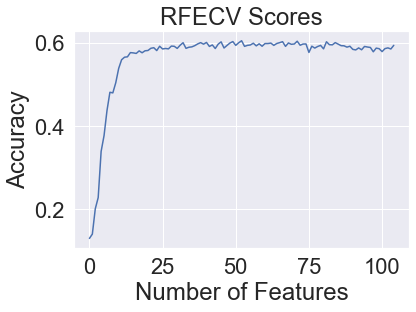

In [30]:
# rfecv
from sklearn.ensemble import RandomForestClassifier

rfe_estimator = RandomForestClassifier()
rfecv_1 = RFECV(rfe_estimator, step=1, min_features_to_select=1, scoring='accuracy', verbose=12, n_jobs=-1)
rfecv_1.fit(X1,y)

# Transform features RFECV
X_rfe = rfecv_1.transform(X1)

# Plot Features vs Score for RFECV
plt.plot(rfecv_1.grid_scores_[:])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('RFECV Scores')

In [31]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=-1)
xgb = XGBClassifier()

print('Cross validation mean Accuracy score')
lr_cv = cross_val_score(lr,X_rfe,y,cv =5, scoring = 'accuracy').mean()
print('For Logistic Regression : ',round(lr_cv,3))

lr_rf = cross_val_score(rf,X_rfe,y,cv = 5, scoring = 'accuracy').mean()
print('For RandomForest : ',round(lr_rf,3))

lr_xgb = cross_val_score(xgb,X_rfe,y,cv = 5, scoring = 'accuracy').mean()
print('For XGBoost : ',round(lr_xgb,3))


Cross validation mean Accuracy score
For Logistic Regression :  0.676
For RandomForest :  0.6
For XGBoost :  0.409


'Cross validation mean Accuracy score with rfe\nFor Logistic Regression :  0.673\nFor RandomForest :  0.601\nFor XGBoost :  0.426'

### Over-samploing with respect to target because of class imbalance.

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN

In [33]:
# Over-sampling using SMOTE
sm = SMOTE(random_state = 2) 

X_res_rfe, y_res_rfe = sm.fit_sample(X_rfe, y) 

In [34]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=-1)
xgb = XGBClassifier()

print('Cross validation mean Accuracy score')
lr_cv = cross_val_score(lr,X_res_rfe,y_res_rfe,cv =5, scoring = 'accuracy').mean()
print('For Logistic Regression : ',round(lr_cv,3))

lr_rf = cross_val_score(rf,X_res_rfe,y_res_rfe,cv = 5, scoring = 'accuracy').mean()
print('For RandomForest : ',round(lr_rf,3))

lr_xgb = cross_val_score(xgb,X_res_rfe,y_res_rfe,cv = 5, scoring = 'accuracy').mean()
print('For XGBoost : ',round(lr_xgb,3))

Cross validation mean Accuracy score
For Logistic Regression :  0.676
For RandomForest :  0.746
For XGBoost :  0.604


### Key take aways from over-sampling
Non-Linear models suffered with imbalanced data set. After oversampling, Non-Linear models performed much better though there was a significant performance reduction for Logistic Regression model.

## Hyper-Parameter Tuning

### Tuning Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV

logisticregression_params_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty': ['l2','l1'],
               'C': [100, 10, 1.0, 0.1, 0.01]
              }
print(" Logistic Regression Parameter Grid \n", logisticregression_params_grid)

 Logistic Regression Parameter Grid 
 {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2', 'l1'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [37]:
# Grid Search for Logistic Regression
lr = LogisticRegression()

lr_grid = GridSearchCV(estimator = lr, param_grid = logisticregression_params_grid, n_jobs = -1, verbose = 5, scoring='accuracy')
lr_grid = lr_grid.fit(X_res_rfe, y_res_rfe)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.8min finished


In [38]:
print('Best Logistic Regression Tuning Score : ',lr_grid.best_score_)
print('Best Hyper-Parameters : ',lr_grid.best_params_)

Best Logistic Regression Tuning Score :  0.676084238869122
Best Hyper-Parameters :  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [41]:
# Tuned Logistic Regression Model
lr_ht = LogisticRegression(C = 10, penalty = 'l2', solver = 'newton-cg')

### RandomForest Classifier

In [42]:
randomforest_params_grid = {'n_estimators': [200],
               'max_features': ['auto'],
               'max_depth': [28],
               'min_samples_split': [2],
               'min_samples_leaf': [2]
              }
print(" Parameter Grid \n", randomforest_params_grid)

 Parameter Grid 
 {'n_estimators': [200], 'max_features': ['auto'], 'max_depth': [28], 'min_samples_split': [2], 'min_samples_leaf': [2]}


In [43]:
# Grid search for RandomForest Classifier

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = randomforest_params_grid, scoring = 'accuracy', cv = 5,
                       verbose = 5, n_jobs = -1, return_train_score = True)
# Fit the random search model
rf_grid.fit(X_res_rfe, y_res_rfe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [28], 'max_features': ['auto'],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [200]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [44]:
print('Best RandomForest Tuning Score : ',rf_grid.best_score_)
print('Best Hyper-Parameters : ',rf_grid.best_params_)

Best RandomForest Tuning Score :  0.7397634387921916
Best Hyper-Parameters :  {'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
# Tuned RandomForest Classifier
rf_ht = RandomForestClassifier(max_depth = 28, max_features = 'auto', min_samples_leaf = 2,
                               min_samples_split = 2, n_estimators = 200)

### XGBClassifier

In [46]:
xgb_params_grid = {
    'max_depth' : [8],'min_child_weight' : [1],
    'n_estimators' : [400],
    'gamma' : [0.001],
    'subsample':[0.8], 'colsample_bytree':[0.5],
    'reg_alpha':[0],
    'learning_rate' : [0.01]
}
print(" Parameter Grid \n", xgb_params_grid)

 Parameter Grid 
 {'max_depth': [8], 'min_child_weight': [1], 'n_estimators': [400], 'gamma': [0.001], 'subsample': [0.8], 'colsample_bytree': [0.5], 'reg_alpha': [0], 'learning_rate': [0.01]}


In [47]:
gs_xgb = GridSearchCV(XGBClassifier(), xgb_params_grid, n_jobs=-1, verbose=2,scoring='accuracy',return_train_score=True)
gs_xgb.fit(X_res_rfe, y_res_rfe)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 28.7min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_j

In [52]:
print('Best XGBoost Tuning Score : ',gs_xgb.best_params_,'\n')
print('Best Hyper-Parameters : ',gs_xgb.best_score_)

Best XGBoost Tuning Score :  {'colsample_bytree': 0.5, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 0, 'subsample': 0.8} 

Best Hyper-Parameters :  0.6138282527166073


In [49]:
# Tuned XGBoost Classifier
xgb_ht = XGBClassifier(colsample_bytree = 0.5, gamma = 0.001, learning_rate = 0.01, max_depth = 8, min_child_weight = 1,
                       n_estimators = 400, reg_alpha = 0, subsample = 0.8)

## 6. Stacking
Stacking Logistic regression, RandomForestClassifier & XGBClassifier.

In [50]:
# StackingClassifier with Hyper-parameter tuned Models
from sklearn.ensemble import StackingClassifier

estimators_ht = [
    ('rf', rf_ht),
    ('xgb', xgb_ht),('lr', lr_ht)
]

stk_clf_ht = StackingClassifier(
    estimators = estimators_ht, final_estimator = LogisticRegression()
)

cv_stk_ht = cross_val_score(stk_clf_ht, X_res_rfe, y_res_rfe, cv = 5, scoring = 'accuracy').mean()
print('For Stacking Classifier, Accuracy : ',round(cv_stk_ht,3))

For Stacking Classifier :  0.846


### Test Data Prediction and Submission

In [ ]:
# Perform Standardization and RFECV transform then predict 
test_pred = stk_clf_ht.fit(X_res_rfe, y_res_rfe).predict(rfecv_1.transform(ss.transform(test)))

test_pred_df = pd.DataFrame({'overall':test_pred})
test_pred_df.to_csv('submission.csv', index = False)

# Analysis
1. Through over-sampling & stacking there was an improvement of around 18% in accuracy score.
2. Stacking Logistic regression model with RandomForest and XGBoost produced the best classification result with 0.76 Accuracy.
3. To overcome the class imbalance between the 5 classes, synthetic minority over-sampling was performed after text vectorization which generated a considerable amount of synthetic data and also tremendously enchanced the accuracy score.
4. I will update the models in future and try to implement new approach to attain even better performance.

Update(23-01-2020) : Accuracy increased from 0.76 to 0.811 using Recursive Feature Elimination with Cross-Validation Technique.  
update(26-01-2020) : Accuracy increased from 0.811 to 0.844 using StackingClassifier with Hyper-parameter Tuned Estimators.